# III - Data Analysis with ChiVO: ACALib

ACALib is a ChiVO library for advanced computing for astronomical data. The stable version can be installed using ``pip``, the development version can be found at [github](https://github.com/ChileanVirtualObservatory/acalib) and the documentation is at [ReadTheDocs](http://acalib.readthedocs.io/en/latest/)




In [1]:
import acalib

## User Programmatic Interface (UPI)
The user programmatic interface of ACALib offers a simple yet powerfull interface for astronomers. In this section we introduce:
- Basic File Manipulations
- 2D Data Visualization and Manipulation

## 1.- File downloading and loading with ACALib

In [2]:
#!rm M100_Band3_ReferenceImages_CASA3.3.tgz
filename = acalib.download("https://bulk.cv.nrao.edu/almadata/sciver/M100Band3_12m/M100_Band3_ReferenceImages_CASA3.3.tgz")

INFO: File M100_Band3_ReferenceImages_CASA3.3.tgz is already downloaded, skipping... [acalib.io.readwrite]


In [3]:
filelist=acalib.uncompress(filename)
filelist

filename,size
,Mbyte
str47,float64
M100_Band3_ReferenceImages,0.0
M100_Band3_ReferenceImages/M100-CO_contmap.png,0.019958
M100_Band3_ReferenceImages/M100-CO_map.png,0.035671999999999995
M100_Band3_ReferenceImages/M100-CO_velfield.png,0.026711
M100_Band3_ReferenceImages/M100cont.image.fits,0.26208
M100_Band3_ReferenceImages/M100line.image.fits,57.71232
M100_Band3_ReferenceImages/M100-CO.mom0.fits,0.7632
M100_Band3_ReferenceImages/M100-CO.mom1.fits,0.7632


In [4]:
M100cont = acalib.load("M100_Band3_ReferenceImages/M100cont.image.fits")  

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Removing superfluous dimension STOKES (kept in the metadata) [acalib.io.fits]
INFO: Removing superfluous dimension FREQ (kept in the metadata) [acalib.io.fits]


Please note that ACALib uses Astropy's Tables and N-Dimensional Data classes for all operations. These classes are called Tables and Data, and we will use them always in ACALib

In [5]:
type(M100cont)

acalib.upi.data.Data

In [6]:
type(filelist)

astropy.table.table.Table

## 2.- Two-Dimensional Data Manipulation
### Quick view

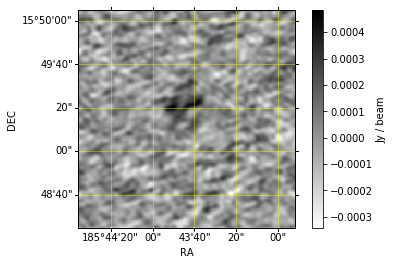

In [7]:
M100cont.visualize()

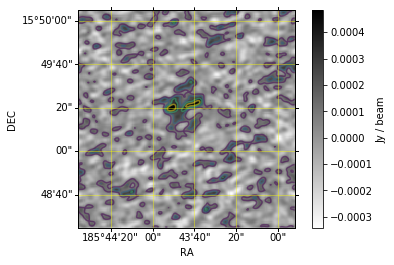

In [8]:
M100cont.visualize_image(contour=True)

In [9]:
M100cont.visualize_spectra()

### World Coordinate System and Other Metadata

In [10]:
center=M100cont.center()
center

array([<Quantity 15.82083333 deg>, <Quantity 185.72875 deg>], dtype=object)

In [11]:
M100cont.axes_names()

array(['DEC', 'RA'], dtype='<U3')

In [12]:
res=M100cont.resolution()
res

array([<Quantity 0.00013889 deg>, <Quantity -0.00013889 deg>],
      dtype=object)

In [13]:
res[0].to("arcsec")

<Quantity 0.5 arcsec>

In [14]:
[lower,upper]=M100cont.extent()
lower

array([<Quantity 15.80694397 deg>, <Quantity 185.74318474 deg>],
      dtype=object)

In [15]:
upper

array([<Quantity 15.83472175 deg>, <Quantity 185.71431328 deg>],
      dtype=object)

In [16]:
M100cont.spectral_velocities()

ERROR: Not spectral axis found. [acalib.upi.axes]


In [17]:
M100cont.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 185.72875  15.82083333333  
CRPIX : 101.0  101.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  
NAXIS : 200  200  1  1

In [18]:
M100cont.meta

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  200                                                  
NAXIS2  =                  200                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.300972965029E-03                                                  
BMIN    =   8.133438560698E-04                                                  
BPA     =   1.038363113403E+02                                                  
BTYPE   = 'Intensity'       

## 2.1.- Data Analysis
Lets try to estimate the signal to noise ratio of the image

In [19]:
M100cont.rms()

<Quantity 9.8427713e-05 Jy / beam>

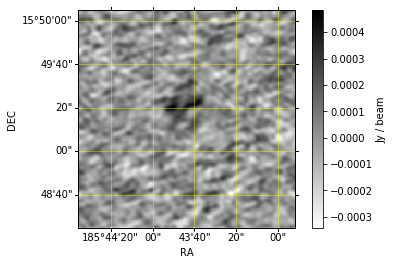

In [20]:
M100cont.visualize()

In [21]:
help(M100cont.opening)

Help on method opening in module acalib.upi.data:

opening(center, window) method of acalib.upi.data.Data instance
    Field of view (center +- window) converted to indices
    
    Parameters
    ----------
    center : astropy.units.quantity.Quantity
        Center of the field of view in WCS.
    window : astropy.units.quantity.Quantity
        Window for the field in WCS.
    
    Returns
    -------
    result: ((M1,N1,Z1),(M2,N2,Z2)) tuple of tuple of ints



In [22]:
region = M100cont.opening(center,40*res)
print(region[0],region[1])

[60 62] [140 138]


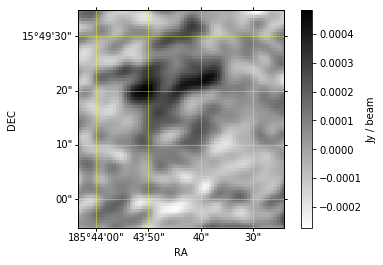

In [23]:
M100cut = M100cont.cut(region)
M100cut.visualize()

In [24]:
M100cut.rms()/M100cont.rms()

<Quantity 1.25722668>

### Can we make this more interactive?

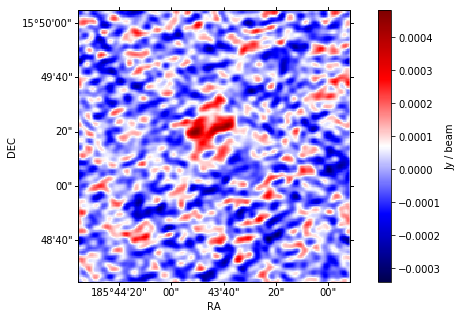

array([[  0,   0],
       [200, 200]])

In [42]:
M100cont.select_region(interactive=True)

In [36]:
noise_region = [[125, 0], [199, 60]]

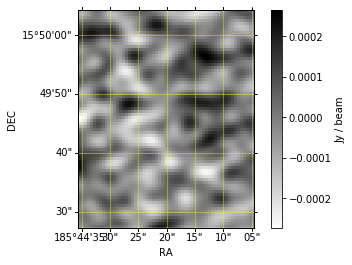

<Quantity 9.15707438e-05 Jy / beam>

In [27]:

M100noise = M100cont.cut(noise_region)
M100noise.visualize()
noise = M100noise.rms()
noise

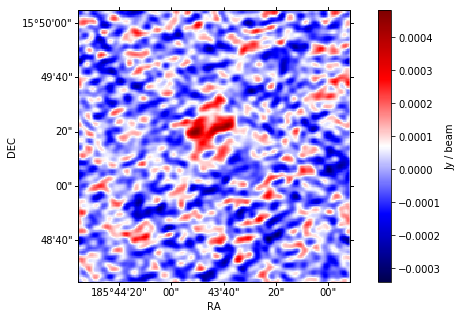

array([[  0,   0],
       [200, 200]])

In [48]:
M100cont.select_region(interactive=True)

In [29]:
signal_region = [[82, 68], [147, 122]]

In [30]:
M100signal = M100cont.cut(signal_region)
signal = M100signal.rms()
signal

<Quantity 0.00014435 Jy / beam>

In [31]:
signal/noise

<Quantity 1.57641723>

## 2.2.- Denoising

In [32]:
help(acalib.denoise)

Help on function denoise in module acalib.upi.flux:

denoise(data, wcs=None, mask=None, unit=None, threshold=0.0)
    Simple denoising given a threshold (creates a new object)
    
    Parameters
    ----------
    data : (M,N) numpy.ndarray or astropy.nddata.NDData or astropy.nddata.NDDataRef
    wcs : World Coordinate System data (http://docs.astropy.org/en/stable/wcs/)
    mask : numpy.ndarray
        mask for the data
    unit : astropy.units.Unit
        Astropy Unit (http://docs.astropy.org/en/stable/units/)
    threshold : float
    
    Returns
    -------
    NDDataRef: Data denoised



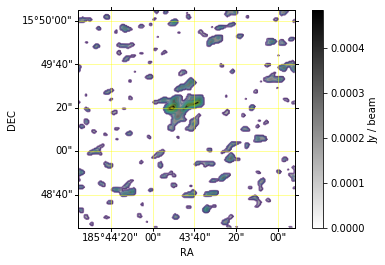

In [33]:
M100den = acalib.denoise(M100cont,threshold=1.5*noise)
M100den.visualize_image(contour=True)

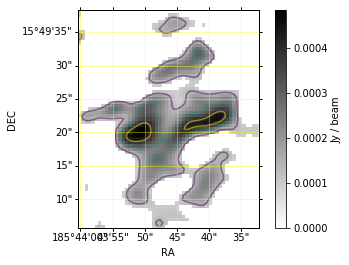

In [34]:
M100sigden= acalib.denoise(M100signal,threshold=1.0*noise)
M100sigden.visualize_image(contour=True)

In [35]:
table = M100sigden.features()
table.show_in_notebook()

idx,DEC,RA
,deg,deg
0,15.818333284483995,185.73336937644225
1,15.818333287489116,185.7332250209282
2,15.818333290398854,185.73308066541415
3,15.818333293213174,185.73293630990014
4,15.818333295932089,185.73279195438616
5,15.818333298555611,185.7326475988722
6,15.818333301083742,185.73250324335822
7,15.818333303516454,185.73235888784433
8,15.818333305853775,185.7322145323304


## 2.3.- Clump Finding

In [36]:
help(acalib.ClumpFind)

Help on class ClumpFind in module acalib.algorithms.clumpfind:

class ClumpFind(acalib.algorithms.algorithm.Algorithm)
 |  Parent class of algorithms module. It defines the common
 |  interface that all algorithms should have.
 |  
 |  Method resolution order:
 |      ClumpFind
 |      acalib.algorithms.algorithm.Algorithm
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  default_params(self)
 |      Set default params to algorithm's cofiguration. Every algorithm has to implement their own default parameters.
 |  
 |  run(self, data)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from acalib.algorithms.algorithm.Algorithm:
 |  
 |  __init__(self, params=None)
 |      Load default params if None given.
 |      
 |      Parameters
 |      ----------            
 |          params : dict (default = None)
 |              Dictionary with algorithm's parameters
 |  
 |  get_param(self, key)
 |      Get the value of a parame

In [37]:
cf=acalib.ClumpFind()
cf.config['RMS'] = noise.value

In [39]:
res=cf.run(M100cont)

AttributeError: 'Data' object has no attribute 'shape'

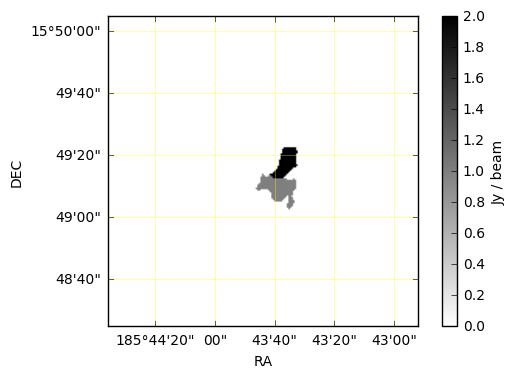

In [39]:
acalib.visualize(res[0])

## 2.4.- Multiscale Segmentation

In [40]:
help(acalib.GMS)

Help on class GMS in module acalib.algorithms.gms:

class GMS(acalib.algorithms.algorithm.Algorithm)
 |  Gaussian Multiscale Segmentation:
 |  
 |  Using a mixture of gaussians make an multiscale segmentation to get the region of interest of a 2D astronomical image.
 |  
 |  Parameters
 |  ----------
 |  params : dict (default = None)
 |      Algorithm parameters, allowed keys:
 |       
 |      P : float (default = 0.05)
 |          Thresholding quantile for multiscale segmentation.
 |      PRECISION : float (default = 0.02)
 |          Smallest scale percentage for the multiscale segmentation.
 |  
 |  References
 |  ----------
 |  .. [1] Araya, M., Candia, G., Gregorio, R., Mendoza, M., & Solar, M. (2016). Indexing data cubes for content-based searches in radio astronomy. Astronomy and Computing, 14, 23-34.
 |  
 |  Method resolution order:
 |      GMS
 |      acalib.algorithms.algorithm.Algorithm
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  default_params(self)
 

In [41]:
gms = acalib.GMS()
gms.config

{'P': 0.05, 'PRECISION': 0.02}

In [42]:
gms.config['P']=0.1
gms.config['PRECISION']=0.001

In [43]:
imglist = gms.run(M100sigden)
len(imglist)

3

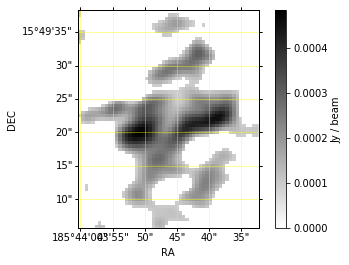

In [44]:
M100sigden.visualize()

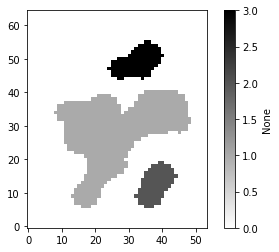

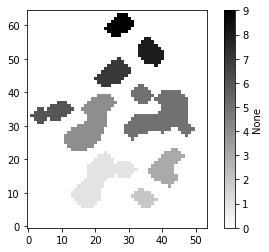

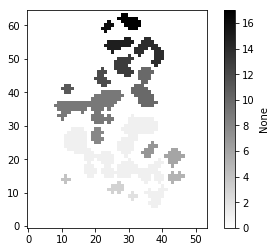

In [45]:
for i in imglist:
    acalib.visualize(i)

## 3.- 3D Data Analysis

In [46]:
M100line = acalib.load("M100_Band3_ReferenceImages/M100line.image.fits") 

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Removing superfluous dimension STOKES (kept in the metadata) [acalib.io.fits]


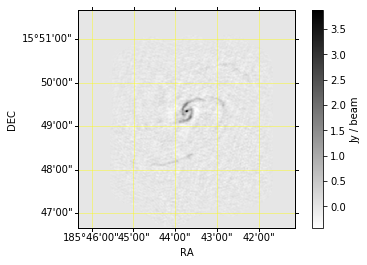

In [47]:
M100line.visualize_image()

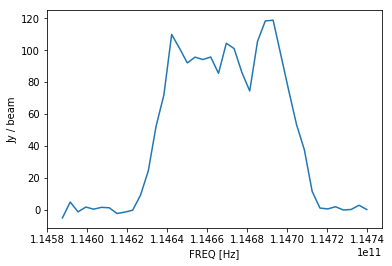

In [48]:
M100line.visualize_spectra()

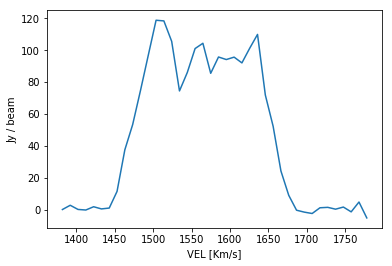

In [49]:
M100line.visualize_spectra(velocities=True)

In [50]:
center=M100line.center()
center

array([<Quantity 114587503125.0 Hz>, <Quantity 15.81944444444 deg>,
       <Quantity 185.72875 deg>], dtype=object)

In [51]:
resolution=M100line.resolution()
resolution

array([<Quantity 3906250.0 Hz>, <Quantity 0.0001388888888889 deg>,
       <Quantity -0.0001388888888889 deg>], dtype=object)

In [52]:
M100line.wcs.axis_type_names

['RA', 'DEC', 'FREQ']

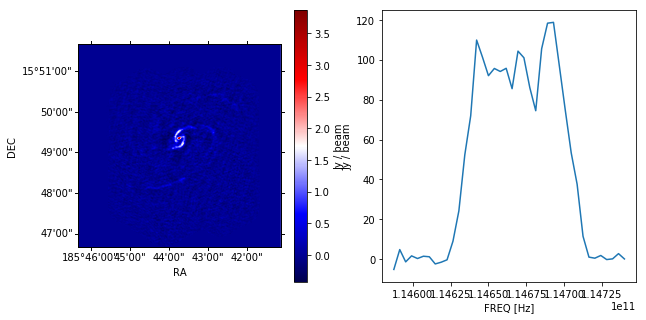

array([[  0,   0,   0],
       [ 40, 600, 600]])

In [53]:
region=M100line.select_region(interactive=True)

In [54]:
reg1=[[0, 259, 235], [40, 385, 361]]

In [55]:
M100core = M100line.cut(reg1)
M100core.visualize()

A Jupyter Widget

In [56]:
M100core.select_band(interactive=True)

In [57]:
reg2=[[11,  0,  0],[ 33, 126, 126]]

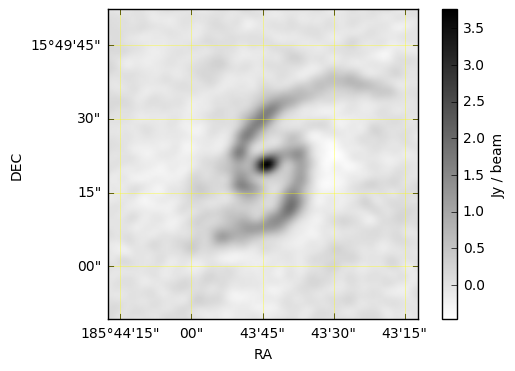

In [58]:
M100work = M100core.cut(reg2)
M100work.visualize_image()

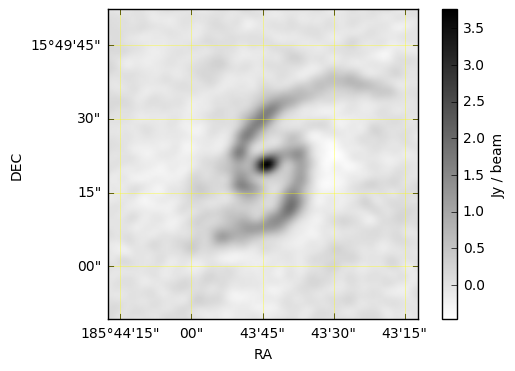

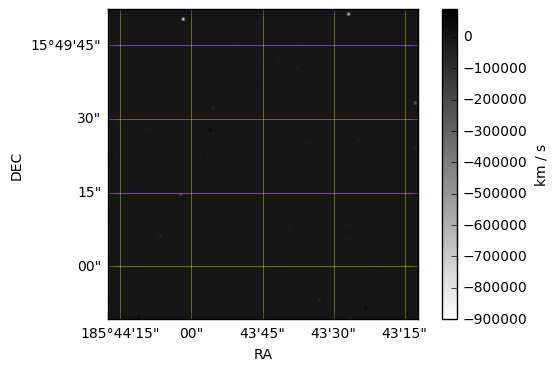

In [59]:
m0=M100work.moment0()
m0.visualize()
m1=M100work.moment1()
m1.visualize()

In [60]:
M100line.select_region(interactive=True)

In [61]:
region = [[0, 142, 320], [40, 235, 473]]
myrms = M100line.cut(region).rms()
myrms

<Quantity 0.007861294139375504 Jy / beam>

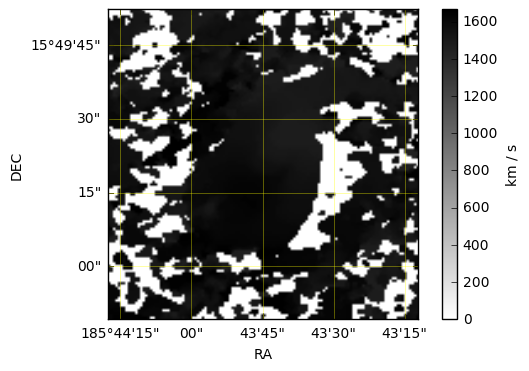

In [63]:
M100workden.moment1().visualize()

In [64]:
table=M100workden.features()

In [65]:
table

FREQ,DEC,RA
Hz,deg,deg
float64,float64,float64
114630471875.0,15.8137497985,185.738132896
114630471875.0,15.8137498046,185.737988544
114630471875.0,15.8137498107,185.737844191
114630471875.0,15.8137498166,185.737699839
114630471875.0,15.8137498225,185.737555487
114630471875.0,15.8137498283,185.737411135
114630471875.0,15.813749834,185.737266782
114630471875.0,15.8137498395,185.73712243


In [66]:
idx = acalib.Indexing()
idx.config

AttributeError: module 'acalib' has no attribute 'Indexing'

In [ ]:
idx.run(M100workden)